<a href="https://colab.research.google.com/github/wayneotemah/Learing-TensorFlow/blob/main/neural_net_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# classification problem, with neural  networks

##Create data to view and fit

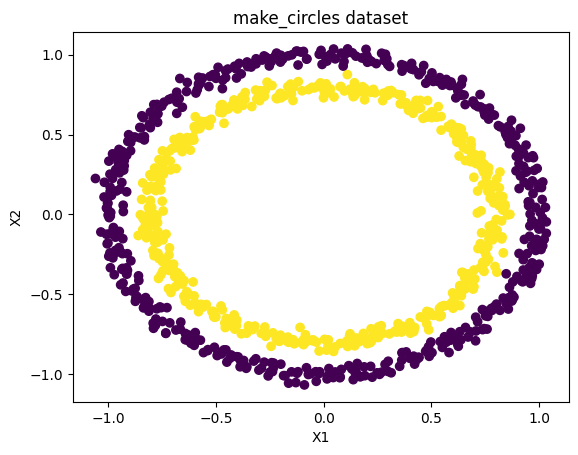

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
# make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('make_circles dataset')
plt.show()

In [2]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
# visualise as a pandas dataframe

import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


## input and output shapes

In [5]:
X.shape,y.shape
X[0].shape

(2,)

# Step in modeling

In [6]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="softmax")
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
              )


model.fit(X_train,y_train,epochs=50)

model.evaluate(X_test,y_test)

In [ ]:
# improve by taining for longer
model.fit(X_train,y_train,epochs=200)

model.evaluate(X_test,y_test)

Since we are workng on a binary classification , 47% accuracy is as good as guessing

lets make the modal larger

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,),
    tf.keras.layers.Dense(1,),
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_2.fit(X_train,y_train,epochs=100)

model_2.evaluate(X_test,y_test)

Still to low

# improve the model more( using more tricks)

In [20]:
    # tf.keras.layers.Dense(1,activation="softmax")
model_3 = tf.keras.Sequential([
    # tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "softmax")
])
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

model_3.fit(X_train,y_train,epochs = 200, verbose  = 0)
# model_3.evaluate(X_test,y_test)

In [21]:
y_pred = model_3.predict(X_test)

10/10 [==============================] - 0s 2ms/step


To visualise model prdections

In [54]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


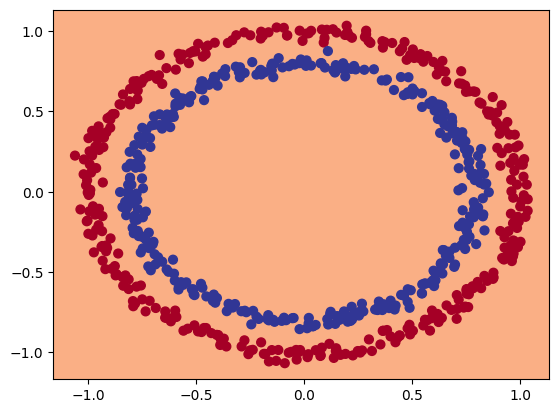

In [25]:
# check predictions,
plot_decision_boundary(model=model_3,X=X_train,y=y_train)

In [34]:
# Lets see if the model can be used for a regrassion problem....
tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

X_regression = X_regression.numpy()
y_regression = y_regression.numpy()

# Split the rigrssion data to train and test sets

from sklearn.model_selection import train_test_split

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression,
                                                                    y_regression,
                                                                    # test_size=0.2,
                                                                    random_state=42
                                                                    )


X_reg_train = tf.constant(X_reg_train)
X_reg_test = tf.constant(X_reg_test)
y_reg_train = tf.constant(y_reg_train)
y_reg_test = tf.constant(y_reg_test)


# fit model_3
# model_3.fit(X_reg_train,y_reg_train,epochs=100) the model was compild for a binary classification porblem, we want to handel a regression problem

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_4.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

In [39]:
model_4.evaluate(X_reg_test,y_reg_test)

2/2 [==============================] - 0s 9ms/step - loss: 37.2417 - mae: 37.2417


[37.241661071777344, 37.241661071777344]

In [ ]:
# Make predictions with our trainde model

y_reg_preds = model_4.predict(X_reg_test)

# plot the model's predictions againte out regression dat

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b",label = "Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds, c = "r", label="Predictions")
plt.legend()

# Non-Linearinty

In [59]:
# lets lot a model with a non-lineat activation
tf.random.set_seed(42)

# 1. create model with non linear activation

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1),
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model_5.fit(X,y,epochs=1000,verbose=0)

In [60]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9930


[0.01372568029910326, 0.9929999709129333]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


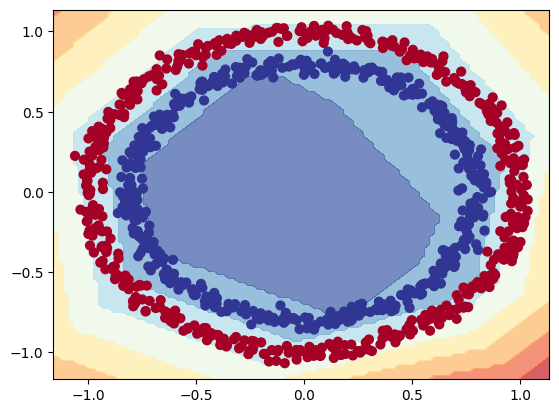

In [61]:
# lets visualise the results of the data we are getting

plot_decision_boundary(model_5,X,y)


model is better but it talke to 1000 epoches to train, lets try reduce that

In [72]:
# lets lot a model with a non-lineat activation
tf.random.set_seed(42)

# 1. create model with non linear activation

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model_5.fit(X,y,epochs=10,verbose=0)

In [73]:
# Evaluate the 
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9950


[0.01039037387818098, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


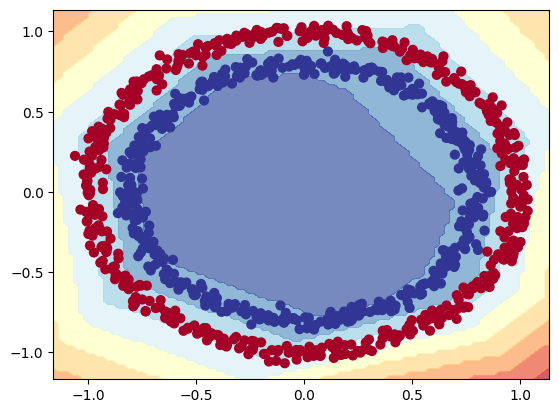

In [74]:
# visualise decision boundary
plot_decision_boundary(model_5,X,y)